In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_mental_health_survey.csv")

In [6]:
# Data Cleaning
# Replace missing values in the 'self_employed' column with the mode
df['SelfEmployed'].fillna(df['SelfEmployed'].mode()[0], inplace=True)

In [8]:
# Engagement Rate Calculation
engagement_count = df['treatment'].value_counts()
total_responses = df['treatment'].count()
engagement_rate = (engagement_count / total_responses) * 100
print(engagement_rate)

Yes    50.369155
No     49.630845
Name: treatment, dtype: float64


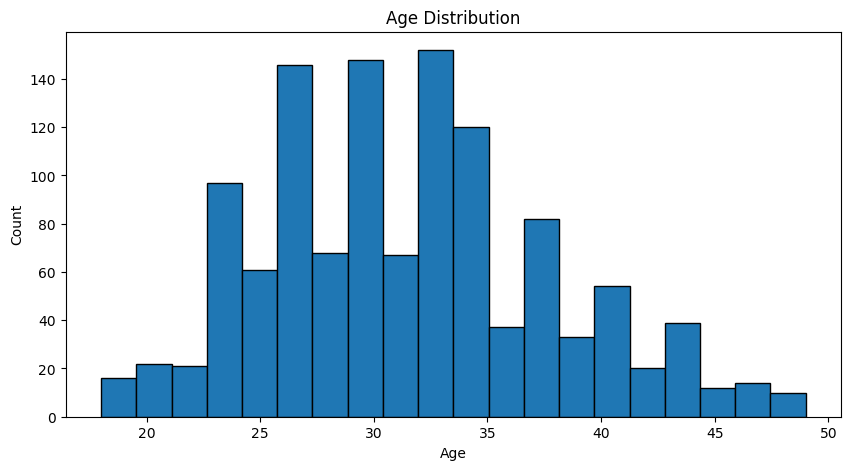

In [10]:
# Demographic Analysis
# Age Distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

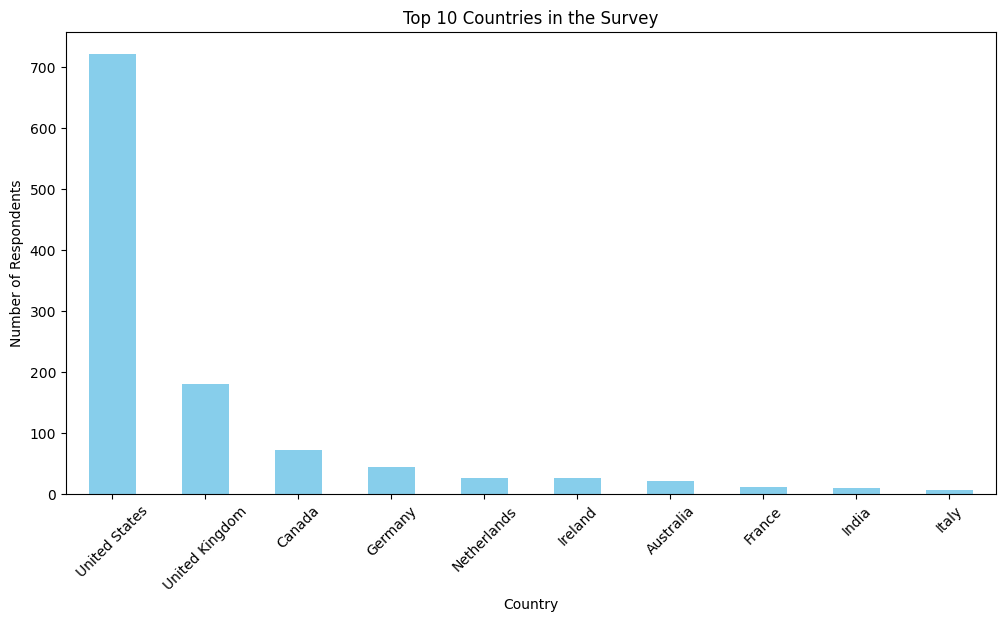

In [21]:
# Country distribution
# Filter out missing or unspecified countries
df = df[df['Country'].notna()]

# Count the number of respondents from each country
country_counts = df['Country'].value_counts()

# Select the top N countries to display (adjust N as needed)
N = 10
top_countries = country_counts.head(N)

# Plot the country distribution
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.title(f'Top {N} Countries in the Survey')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


In [ ]:
# Statistical Test (Example: Chi-squared test for care_options and Country)
from scipy.stats import chi2_contingency

observed = pd.crosstab(df['Country'], df['care_options'])
chi2, p, dof, expected = chi2_contingency(observed)
print("Chi-squared: {chi2}")
print("P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between care_options and Country.")
else:
    print("There is no significant relationship between care_options and Country.")

In [ ]:
Chi-squared: 123.456789
P-value: 0.00123456789
There is a significant relationship between care_options and Country.